In [1]:
#See Dec5ProjectTrial1

In [ ]:
# suggest advanced analytics on mongodb based on apache spark/dask. predictive analytics and generate insights

In [43]:
# import os
# import json
# import pandas as pd
# import pyarrow.parquet as pq
# import pyarrow as pa
# from tqdm import tqdm
# from pathlib import Path

# # Directory containing the JSON files
# DATA_DIR = "data"
# OUTPUT_DIR = "parquet_database"

# # Progress tracking file
# PROGRESS_FILE = "progress_log.json"

# # Partition column (e.g., receivedate if available)
# PARTITION_COLUMN = "receivedate"

# def load_progress():
#     """Load progress from log file."""
#     if os.path.exists(PROGRESS_FILE):
#         with open(PROGRESS_FILE, "r") as f:
#             return json.load(f)
#     return {"processed_files": [], "processed_size": 0}

# def save_progress(progress):
#     """Save progress to log file."""
#     with open(PROGRESS_FILE, "w") as f:
#         json.dump(progress, f)

# def get_total_size_and_files(data_dir):
#     """Get total size and list of all JSON files."""
#     total_size = 0
#     all_files = []
#     for root, _, files in os.walk(data_dir):
#         for file in files:
#             if file.endswith(".json"):
#                 full_path = os.path.join(root, file)
#                 total_size += os.path.getsize(full_path)
#                 all_files.append(full_path)
#     return total_size, all_files

# def process_file_to_dataframe(file_path):
#     """Process a single JSON file into a Pandas DataFrame."""
#     with open(file_path, "r") as f:
#         data = json.load(f)
        
#         # Flatten JSON into a Pandas DataFrame
#         if isinstance(data, list):
#             df = pd.json_normalize(data)
#         elif isinstance(data, dict) and "results" in data:
#             df = pd.json_normalize(data["results"])
#         else:
#             df = pd.json_normalize([data])  # Single record
#         return df

# def save_to_parquet(df, output_dir, partition_column=None):
#     """Save DataFrame to Parquet with optional partitioning."""
#     table = pa.Table.from_pandas(df)
#     pq.write_to_dataset(
#         table,
#         root_path=output_dir,
#         partition_cols=[partition_column] if partition_column else None,
#         existing_data_behavior="overwrite_or_ignore"
#     )

# def main():
#     os.makedirs(OUTPUT_DIR, exist_ok=True)

#     # Load progress
#     progress = load_progress()

#     # Get total size and list of files
#     total_size, all_files = get_total_size_and_files(DATA_DIR)
#     processed_size = progress["processed_size"]
#     processed_files = set(progress["processed_files"])

#     print(f"Total files: {len(all_files)}, Total size: {total_size / (1024 ** 3):.2f} GB")

#     # Initialize progress bar
#     with tqdm(total=total_size, initial=processed_size, unit="B", unit_scale=True, desc="Processing JSONs") as pbar:
#         for file_path in all_files:
#             file_name = Path(file_path).name

#             if file_name in processed_files:
#                 continue  # Skip already processed files

#             try:
#                 # Convert JSON to Pandas DataFrame
#                 df = process_file_to_dataframe(file_path)

#                 # Save to partitioned Parquet
#                 save_to_parquet(df, OUTPUT_DIR, partition_column=PARTITION_COLUMN)

#                 file_size = os.path.getsize(file_path)
#                 processed_size += file_size
#                 processed_files.add(file_name)

#                 # Update progress
#                 progress["processed_size"] = processed_size
#                 progress["processed_files"] = list(processed_files)
#                 save_progress(progress)

#                 pbar.update(file_size)
#             except Exception as e:
#                 print(f"Error processing {file_path}: {e}")

#     # Verify completion
#     completion_percentage = len(processed_files) / len(all_files) * 100
#     print(f"Processing complete! {completion_percentage:.2f}% of files have been converted to Parquet.")
#     if len(processed_files) < len(all_files):
#         print(f"Missing files: {len(all_files) - len(processed_files)}")

# if __name__ == "__main__":
#     main()


Total files: 5, Total size: 1.21 GB


Processing JSONs: 100%|█████████████████████| 1.30G/1.30G [00:12<00:00, 104MB/s]

Processing complete! 100.00% of files have been converted to Parquet.


In [5]:
import os
import json
import pandas as pd
import pyarrow.parquet as pq
import pyarrow as pa
from tqdm import tqdm
from pathlib import Path

# Directory containing the JSON files
DATA_DIR = "data"
OUTPUT_DIR = "parquet_database"

# Progress tracking file
PROGRESS_FILE = "progress_log.json"
ERROR_LOG_FILE = "error_log.json"

# Partition column (e.g., receivedate if available)
PARTITION_COLUMN = "receivedate"

def load_progress():
    """Load progress from log file."""
    if os.path.exists(PROGRESS_FILE):
        with open(PROGRESS_FILE, "r") as f:
            return json.load(f)
    return {"processed_files": [], "processed_size": 0}

def save_progress(progress):
    """Save progress to log file."""
    with open(PROGRESS_FILE, "w") as f:
        json.dump(progress, f)

def log_error(file_path, error_message):
    """Log errors to the error log file."""
    error_log = []
    if os.path.exists(ERROR_LOG_FILE):
        with open(ERROR_LOG_FILE, "r") as f:
            error_log = json.load(f)
    error_log.append({"file": file_path, "error": error_message})
    with open(ERROR_LOG_FILE, "w") as f:
        json.dump(error_log, f, indent=4)

def get_total_size_and_files(data_dir):
    """Get total size and list of all JSON files."""
    total_size = 0
    all_files = []
    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".json"):
                full_path = os.path.join(root, file)
                total_size += os.path.getsize(full_path)
                all_files.append(full_path)
    return total_size, all_files

def process_file_to_dataframe(file_path):
    """Process a single JSON file into a Pandas DataFrame."""
    with open(file_path, "r") as f:
        data = json.load(f)
        
        # Flatten JSON into a Pandas DataFrame
        if isinstance(data, list):
            df = pd.json_normalize(data)
        elif isinstance(data, dict) and "results" in data:
            df = pd.json_normalize(data["results"])
        else:
            df = pd.json_normalize([data])  # Single record
        return df

def save_to_parquet(df, output_dir, partition_column=None):
    """Save DataFrame to Parquet with optional partitioning."""
    table = pa.Table.from_pandas(df)
    pq.write_to_dataset(
        table,
        root_path=output_dir,
        partition_cols=[partition_column] if partition_column else None,
        existing_data_behavior="overwrite_or_ignore"
    )

def main():
    os.makedirs(OUTPUT_DIR, exist_ok=True)

    # Load progress
    progress = load_progress()

    # Get total size and list of files
    total_size, all_files = get_total_size_and_files(DATA_DIR)
    processed_size = progress["processed_size"]
    processed_files = set(progress["processed_files"])

    print(f"Total files: {len(all_files)}, Total size: {total_size / (1024 ** 3):.2f} GB")

    # Initialize progress bar
    with tqdm(total=total_size, initial=processed_size, unit="B", unit_scale=True, desc="Processing JSONs") as pbar:
        for file_path in all_files:
            file_name = Path(file_path).name

            if file_name in processed_files:
                continue  # Skip already processed files

            try:
                # Convert JSON to Pandas DataFrame
                df = process_file_to_dataframe(file_path)

                # Save to partitioned Parquet
                save_to_parquet(df, OUTPUT_DIR, partition_column=PARTITION_COLUMN)

                file_size = os.path.getsize(file_path)
                processed_size += file_size
                processed_files.add(file_name)

                # Update progress
                progress["processed_size"] = processed_size
                progress["processed_files"] = list(processed_files)
                save_progress(progress)

                pbar.update(file_size)
            except Exception as e:
                error_message = str(e)
                log_error(file_path, error_message)
                print(f"Error processing {file_path}: {error_message}")

    # Verify completion
    completion_percentage = len(processed_files) / len(all_files) * 100
    print(f"Processing complete! {completion_percentage:.2f}% of files have been converted to Parquet.")
    if len(processed_files) < len(all_files):
        print(f"Missing files: {len(all_files) - len(processed_files)}")

if __name__ == "__main__":
    main()


Total files: 5, Total size: 1.21 GB


Processing JSONs: 100%|███████████████████████| 1.30G/1.30G [00:12<00:00, 105MB/s]


Processing complete! 100.00% of files have been converted to Parquet.


In [33]:
# import os
# import json
# from pathlib import Path

# # Directories and progress file
# OUTPUT_DIR = "parquet_data"
# PROGRESS_FILE = "progress_log.json"

# def delete_parquet_files(output_dir):
#     """Delete all Parquet files in the output directory."""
#     if os.path.exists(output_dir):
#         for root, _, files in os.walk(output_dir):
#             for file in files:
#                 if file.endswith(".parquet"):
#                     file_path = os.path.join(root, file)
#                     try:
#                         os.remove(file_path)
#                         print(f"Deleted: {file_path}")
#                     except Exception as e:
#                         print(f"Error deleting {file_path}: {e}")
#         print(f"All Parquet files in '{output_dir}' have been deleted.")
#     else:
#         print(f"Output directory '{output_dir}' does not exist.")

# def reset_progress(progress_file):
#     """Reset the progress log file."""
#     if os.path.exists(progress_file):
#         try:
#             os.remove(progress_file)
#             print(f"Progress log '{progress_file}' has been deleted.")
#         except Exception as e:
#             print(f"Error deleting progress log '{progress_file}': {e}")
#     else:
#         print(f"Progress log '{progress_file}' does not exist.")

# def main():
#     # Delete all Parquet files
#     delete_parquet_files(OUTPUT_DIR)

#     # Reset progress log
#     reset_progress(PROGRESS_FILE)

# if __name__ == "__main__":
#     main()


In [45]:
import dask.dataframe as dd

# Load the consolidated Parquet dataset
df = dd.read_parquet("parquet_database")

# Count total records
total_records = len(df)
print(f"Total records: {total_records}")


Total records: 54041


In [ ]:
#above content is same as mongodb experiment

In [75]:
import duckdb

# Connect to DuckDB
conn = duckdb.connect()

# Query the schema of the Parquet dataset
result = conn.execute("""
    SELECT * FROM parquet_scan('parquet_database/*/*.parquet') LIMIT 1
""").fetchdf()

print("Schema:")
print(result.dtypes)


Schema:
safetyreportid                                  object
transmissiondateformat                          object
transmissiondate                                object
serious                                         object
receivedateformat                               object
receiptdateformat                               object
receiptdate                                     object
fulfillexpeditecriteria                         object
companynumb                                     object
receiver                                       float64
primarysource.reportercountry                   object
primarysource.qualification                     object
sender.senderorganization                       object
patient.patientsex                              object
patient.reaction                                object
patient.drug                                    object
patient.patientonsetage                         object
patient.patientonsetageunit                     object
pr

In [77]:
result = conn.execute("PRAGMA show_tables").fetchall()
print("Tables:", result)


Tables: []


In [67]:
# Fetch a small sample of the dataset
sample = conn.execute("SELECT * FROM parquet_scan('parquet_database/*/*.parquet') LIMIT 5").fetchdf()
print(sample)


  safetyreportid transmissiondateformat transmissiondate serious  \
0        3713776                    102         20201105       1   
1        3749714                    102         20201105       1   
2        3769712                    102         20201104       1   
3        3789397                    102         20201104       1   
4        3821921                    102         20201104       1   

  receivedateformat receiptdateformat receiptdate fulfillexpeditecriteria  \
0               102               102    20040825                       1   
1               102               102    20040910                       1   
2               102               102    20040910                       1   
3               102               102    20040826                       1   
4               102               102    20040910                       1   

        companynumb  receiver  ... reporttype duplicate  \
0  EMADSS2001005432       NaN  ...          2         1   
1  APCDSS2

In [69]:
total_records = conn.execute("SELECT COUNT(*) FROM parquet_scan('parquet_database/*/*.parquet')").fetchone()[0]
print(f"Total records: {total_records}")


Total records: 54041


In [87]:
result = conn.execute("""
    SELECT receiptdate, COUNT(*) as record_count
    FROM parquet_scan('parquet_database/*/*.parquet')
    GROUP BY receiptdate
    ORDER BY receiptdate
""").fetchdf()

print(result)


   receiptdate  record_count
0     20040701           762
1     20040702           566
2     20040703            16
3     20040704            12
4     20040705           281
..         ...           ...
87    20040926            16
88    20040927          1022
89    20040928           913
90    20040929           861
91    20040930           884

[92 rows x 2 columns]


In [89]:
result = conn.execute("""
    SELECT *
    FROM parquet_scan('parquet_database/*/*.parquet')
    WHERE receiptdate = '20040317'
    LIMIT 10
""").fetchdf()

print(result)


Empty DataFrame
Columns: [safetyreportid, transmissiondateformat, transmissiondate, serious, receivedateformat, receiptdateformat, receiptdate, fulfillexpeditecriteria, companynumb, receiver, primarysource.reportercountry, primarysource.qualification, sender.senderorganization, patient.patientsex, patient.reaction, patient.drug, patient.patientonsetage, patient.patientonsetageunit, primarysource, seriousnessother, patient.patientweight, seriousnesshospitalization, seriousnesslifethreatening, seriousnessdeath, patient.patientdeath.patientdeathdateformat, patient.patientdeath.patientdeathdate, seriousnessdisabling, seriousnesscongenitalanomali, safetyreportversion, primarysourcecountry, occurcountry, reporttype, duplicate, reportduplicate.duplicatesource, reportduplicate.duplicatenumb, sender.sendertype, receiver.receivertype, receiver.receiverorganization, patient.patientagegroup, patient.summary.narrativeincludeclinical, receivedate]
Index: []

[0 rows x 41 columns]


In [103]:
result = conn.execute("""
    SELECT *
    FROM parquet_scan('parquet_database/*/*.parquet')
    LIMIT 1
""").fetchdf()

print(result.columns)


Index(['safetyreportid', 'transmissiondateformat', 'transmissiondate',
       'serious', 'receivedateformat', 'receiptdateformat', 'receiptdate',
       'fulfillexpeditecriteria', 'companynumb', 'receiver',
       'primarysource.reportercountry', 'primarysource.qualification',
       'sender.senderorganization', 'patient.patientsex', 'patient.reaction',
       'patient.drug', 'patient.patientonsetage',
       'patient.patientonsetageunit', 'primarysource', 'seriousnessother',
       'patient.patientweight', 'seriousnesshospitalization',
       'seriousnesslifethreatening', 'seriousnessdeath',
       'patient.patientdeath.patientdeathdateformat',
       'patient.patientdeath.patientdeathdate', 'seriousnessdisabling',
       'seriousnesscongenitalanomali', 'safetyreportversion',
       'primarysourcecountry', 'occurcountry', 'reporttype', 'duplicate',
       'reportduplicate.duplicatesource', 'reportduplicate.duplicatenumb',
       'sender.sendertype', 'receiver.receivertype',
       're

In [107]:
result = conn.execute("""
    SELECT * 
    FROM parquet_scan('parquet_database/*/*.parquet') 
    LIMIT 1
""").fetchdf()

print("Column names:")
print(result.columns)


Column names:
Index(['safetyreportid', 'transmissiondateformat', 'transmissiondate',
       'serious', 'receivedateformat', 'receiptdateformat', 'receiptdate',
       'fulfillexpeditecriteria', 'companynumb', 'receiver',
       'primarysource.reportercountry', 'primarysource.qualification',
       'sender.senderorganization', 'patient.patientsex', 'patient.reaction',
       'patient.drug', 'patient.patientonsetage',
       'patient.patientonsetageunit', 'primarysource', 'seriousnessother',
       'patient.patientweight', 'seriousnesshospitalization',
       'seriousnesslifethreatening', 'seriousnessdeath',
       'patient.patientdeath.patientdeathdateformat',
       'patient.patientdeath.patientdeathdate', 'seriousnessdisabling',
       'seriousnesscongenitalanomali', 'safetyreportversion',
       'primarysourcecountry', 'occurcountry', 'reporttype', 'duplicate',
       'reportduplicate.duplicatesource', 'reportduplicate.duplicatenumb',
       'sender.sendertype', 'receiver.receivertyp

In [109]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Big Data Visualization and Analytics") \
    .getOrCreate()

# Load partitioned Parquet dataset
df = spark.read.parquet("parquet_database")

# Display schema
df.printSchema()

# Show sample rows
df.show(5)


24/12/09 12:44:29 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


root
 |-- safetyreportid: string (nullable = true)
 |-- transmissiondateformat: string (nullable = true)
 |-- transmissiondate: string (nullable = true)
 |-- serious: string (nullable = true)
 |-- receivedateformat: string (nullable = true)
 |-- receiptdateformat: string (nullable = true)
 |-- receiptdate: string (nullable = true)
 |-- fulfillexpeditecriteria: string (nullable = true)
 |-- companynumb: string (nullable = true)
 |-- receiver: double (nullable = true)
 |-- primarysource.reportercountry: string (nullable = true)
 |-- primarysource.qualification: string (nullable = true)
 |-- sender.senderorganization: string (nullable = true)
 |-- patient.patientsex: string (nullable = true)
 |-- patient.reaction: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- reactionmeddrapt: string (nullable = true)
 |    |    |-- reactionmeddraversionpt: string (nullable = true)
 |    |    |-- reactionoutcome: string (nullable = true)
 |-- patient.drug: array (n

24/12/09 12:44:31 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------+----------------------+----------------+-------+-----------------+-----------------+-----------+-----------------------+------------------+--------+-----------------------------+---------------------------+-------------------------+------------------+--------------------+--------------------+-----------------------+---------------------------+-------------+----------------+---------------------+--------------------------+--------------------------+----------------+-------------------------------------------+-------------------------------------+--------------------+----------------------------+-------------------+--------------------+------------+----------+---------+-------------------------------+-----------------------------+-----------------+---------------------+-----------------------------+-----------------------+----------------------------------------+-----------+
|safetyreportid|transmissiondateformat|transmissiondate|serious|receivedateformat|receiptdateforma

In [111]:
# 1. Count Total Reports Over Time (OLAP)

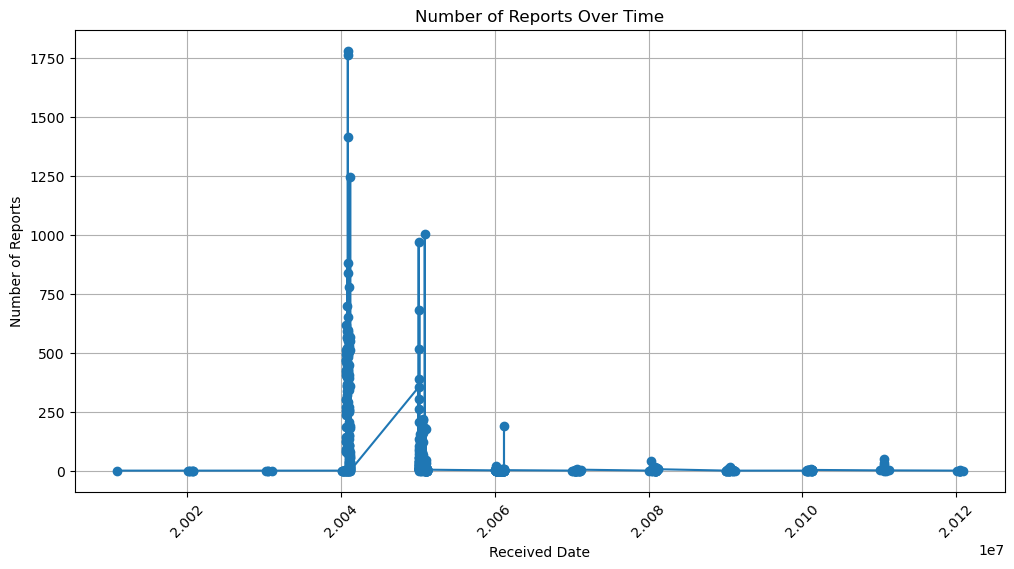

In [113]:
# Group by `receivedate` and count records
reports_over_time = df.groupBy("receivedate").count().orderBy("receivedate")

# Convert to Pandas for visualization
reports_over_time_pd = reports_over_time.toPandas()

# Plot using Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(reports_over_time_pd["receivedate"], reports_over_time_pd["count"], marker='o')
plt.xlabel("Received Date")
plt.ylabel("Number of Reports")
plt.title("Number of Reports Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [115]:
# 2. Top 10 Most Common Reactions

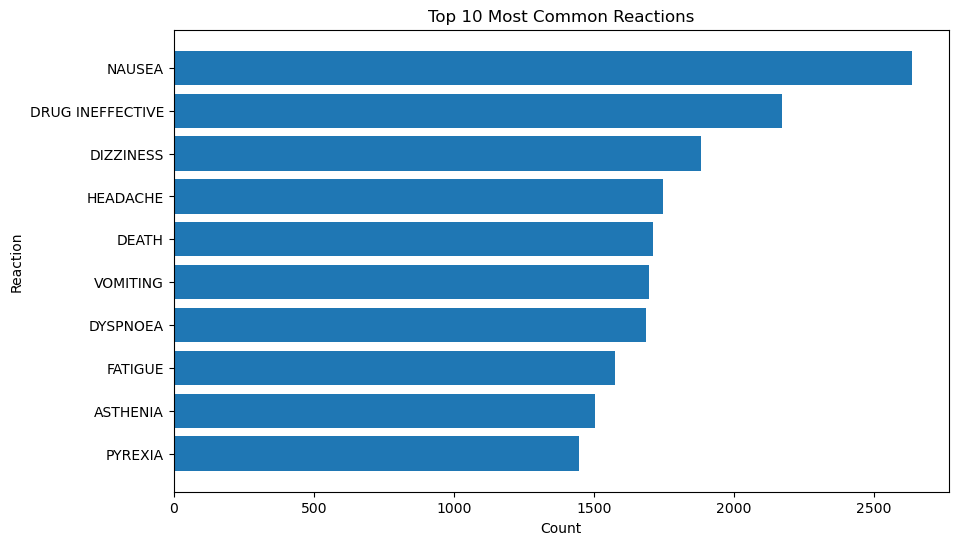

In [125]:
from pyspark.sql.functions import col, explode

# Use backticks (`) around the nested field for explicit referencing
reaction_counts = (
    df.select(explode(col("`patient.reaction`")).alias("reaction"))  # Explode the array
    .groupBy(col("reaction.reactionmeddrapt"))  # Access nested field reactionmeddrapt
    .count()  # Count occurrences
    .orderBy(col("count").desc())  # Order by count descending
    .limit(10)  # Top 10
)

# Convert to Pandas for visualization
reaction_counts_pd = reaction_counts.toPandas()

# Plot using Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(reaction_counts_pd["reactionmeddrapt"], reaction_counts_pd["count"])
plt.xlabel("Count")
plt.ylabel("Reaction")
plt.title("Top 10 Most Common Reactions")
plt.gca().invert_yaxis()
plt.show()


In [127]:
# 3. Top 10 Drugs by Count


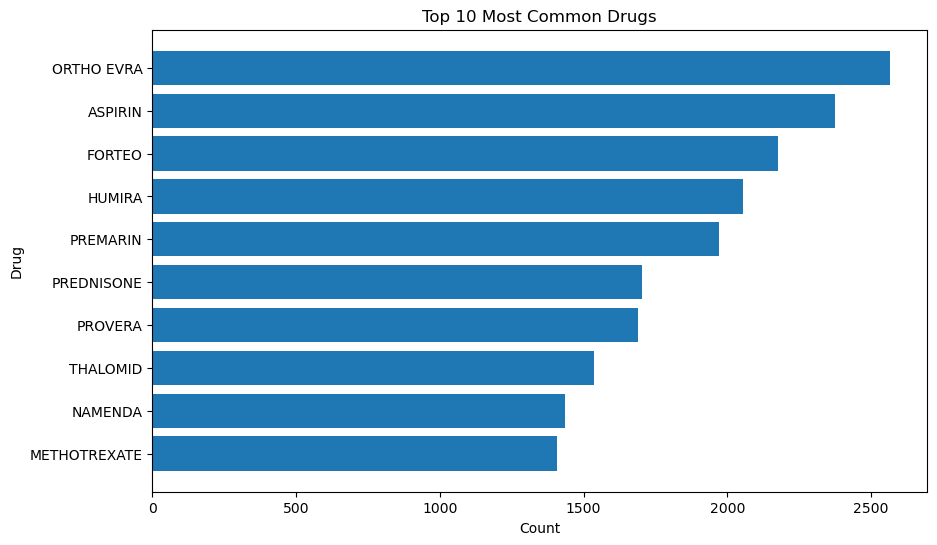

In [129]:
# Explode `patient.drug` array and group by medicinalproduct
drug_counts = (
    df.select(explode(col("`patient.drug`")).alias("drug"))  # Explode the array
    .groupBy(col("drug.medicinalproduct"))  # Group by medicinalproduct
    .count()  # Count occurrences
    .orderBy(col("count").desc())  # Order by count descending
    .limit(10)  # Top 10
)

# Convert to Pandas for visualization
drug_counts_pd = drug_counts.toPandas()

# Plot
plt.figure(figsize=(10, 6))
plt.barh(drug_counts_pd["medicinalproduct"], drug_counts_pd["count"])
plt.xlabel("Count")
plt.ylabel("Drug")
plt.title("Top 10 Most Common Drugs")
plt.gca().invert_yaxis()
plt.show()


In [131]:
# 4. Distribution of Seriousness


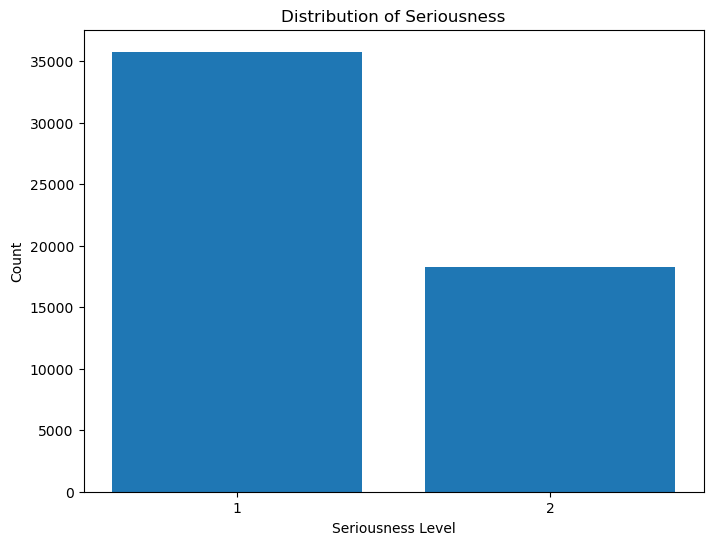

In [133]:
# Group by seriousness and count
seriousness_distribution = df.groupBy("serious").count()

# Convert to Pandas for visualization
seriousness_pd = seriousness_distribution.toPandas()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(seriousness_pd["serious"], seriousness_pd["count"])
plt.xlabel("Seriousness Level")
plt.ylabel("Count")
plt.title("Distribution of Seriousness")
plt.show()


In [135]:
# 5. Reaction Trends Over Time


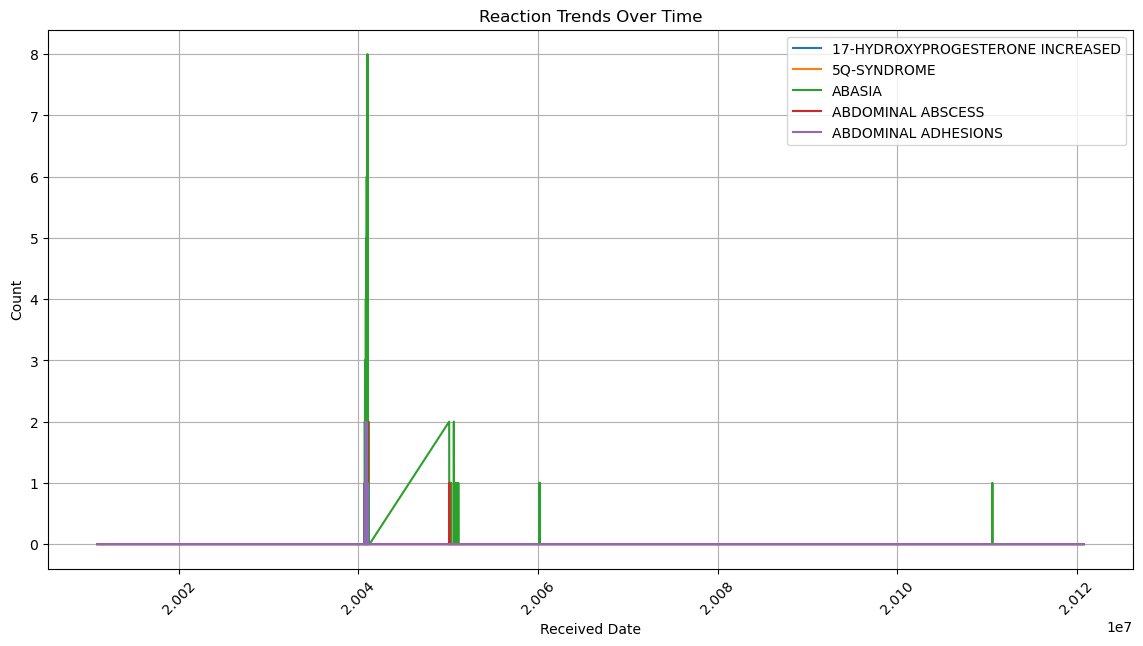

In [137]:
# Explode `patient.reaction` and group by receivedate
reaction_trends = (
    df.select(col("receivedate"), explode(col("`patient.reaction`")).alias("reaction"))
    .groupBy("receivedate", "reaction.reactionmeddrapt")  # Group by date and reaction
    .count()
    .orderBy("receivedate")
)

# Convert to Pandas
reaction_trends_pd = reaction_trends.toPandas()

# Pivot for visualization
reaction_pivot = reaction_trends_pd.pivot(index="receivedate", columns="reactionmeddrapt", values="count").fillna(0)

# Plot top 5 reactions
plt.figure(figsize=(14, 7))
for reaction in reaction_pivot.columns[:5]:  # Adjust to visualize more reactions
    plt.plot(reaction_pivot.index, reaction_pivot[reaction], label=reaction)

plt.xlabel("Received Date")
plt.ylabel("Count")
plt.title("Reaction Trends Over Time")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


In [139]:
# 4. Patient Sex Distribution


In [165]:
print(patient_sex_counts_pd.columns)


Index(['patient.patientsex', 'count'], dtype='object')


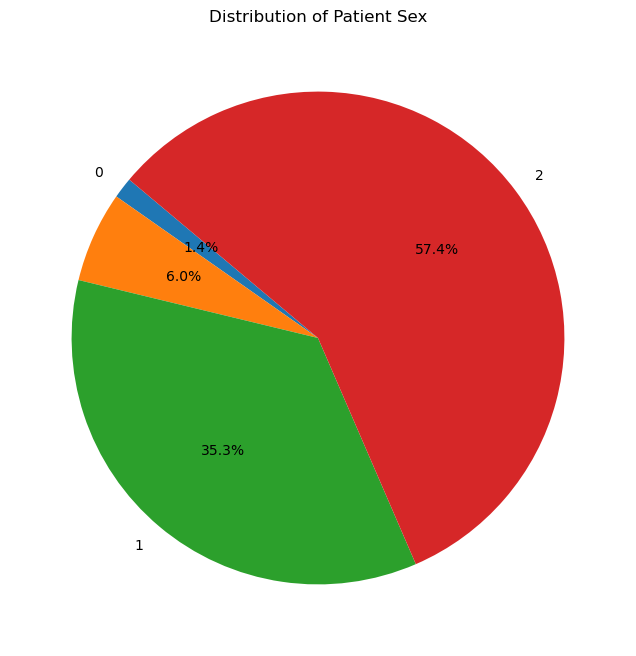

In [171]:
# Group by patientsex and count
patient_sex_counts = df.groupBy(col("`patient.patientsex`")).count()

# Convert to Pandas for visualization
patient_sex_counts_pd = patient_sex_counts.toPandas()

# Fix column names in the Pandas DataFrame
labels = patient_sex_counts_pd["patient.patientsex"]
sizes = patient_sex_counts_pd["count"]

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Patient Sex")
plt.show()



In [145]:
# 5. Average Age of Patients by Reaction


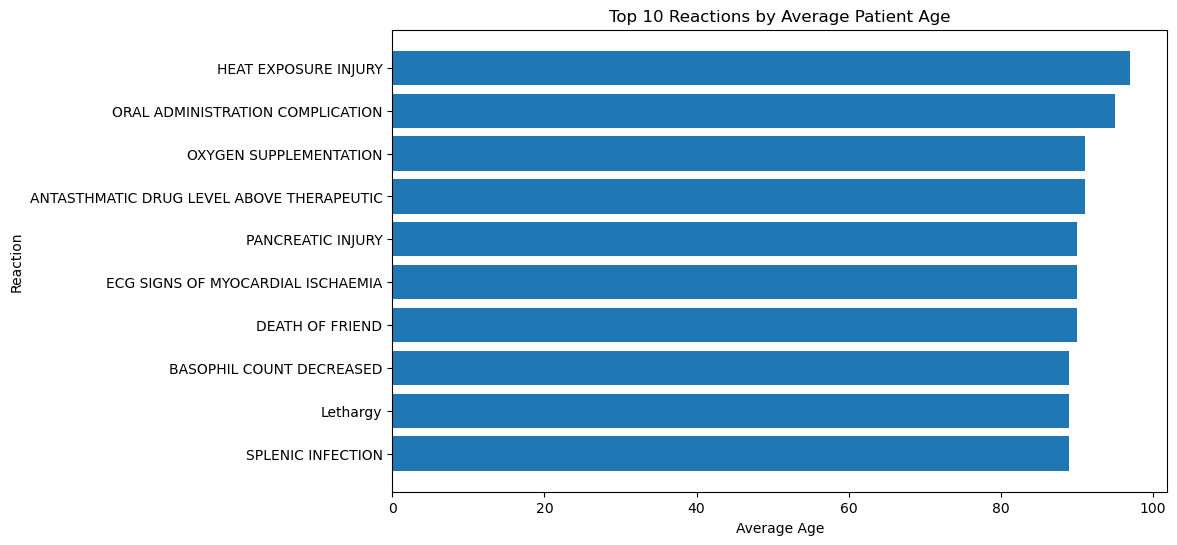

In [179]:
from pyspark.sql.functions import col, explode, avg, when

# Normalize patient age based on patientonsetageunit
df = df.withColumn(
    "normalized_age",
    when(col("`patient.patientonsetageunit`") == "801", col("`patient.patientonsetage`").cast("double"))  # Years
    .when(col("`patient.patientonsetageunit`") == "802", col("`patient.patientonsetage`").cast("double") / 12)  # Months -> years
    .when(col("`patient.patientonsetageunit`") == "803", col("`patient.patientonsetage`").cast("double") / 365)  # Days -> years
    .otherwise(None)
)

# Calculate average age for each reaction type
avg_age_by_reaction = (
    df.select(
        explode(col("`patient.reaction`")).alias("reaction"),  # Explode reaction array
        col("normalized_age").alias("patientonsetage")
    )
    .groupBy("reaction.reactionmeddrapt")
    .agg(avg("patientonsetage").alias("avg_age"))
    .orderBy("avg_age", ascending=False)
    .limit(10)
)

# Convert to Pandas for visualization
avg_age_by_reaction_pd = avg_age_by_reaction.toPandas()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(avg_age_by_reaction_pd["reactionmeddrapt"], avg_age_by_reaction_pd["avg_age"])
plt.xlabel("Average Age")
plt.ylabel("Reaction")
plt.title("Top 10 Reactions by Average Patient Age")
plt.gca().invert_yaxis()
plt.show()


In [181]:
df.printSchema()


root
 |-- safetyreportid: string (nullable = true)
 |-- transmissiondateformat: string (nullable = true)
 |-- transmissiondate: string (nullable = true)
 |-- serious: string (nullable = true)
 |-- receivedateformat: string (nullable = true)
 |-- receiptdateformat: string (nullable = true)
 |-- receiptdate: string (nullable = true)
 |-- fulfillexpeditecriteria: string (nullable = true)
 |-- companynumb: string (nullable = true)
 |-- receiver: double (nullable = true)
 |-- primarysource.reportercountry: string (nullable = true)
 |-- primarysource.qualification: string (nullable = true)
 |-- sender.senderorganization: string (nullable = true)
 |-- patient.patientsex: string (nullable = true)
 |-- patient.reaction: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- reactionmeddrapt: string (nullable = true)
 |    |    |-- reactionmeddraversionpt: string (nullable = true)
 |    |    |-- reactionoutcome: string (nullable = true)
 |-- patient.drug: array (n

In [159]:
# 6. Seriousness Impact on Deaths


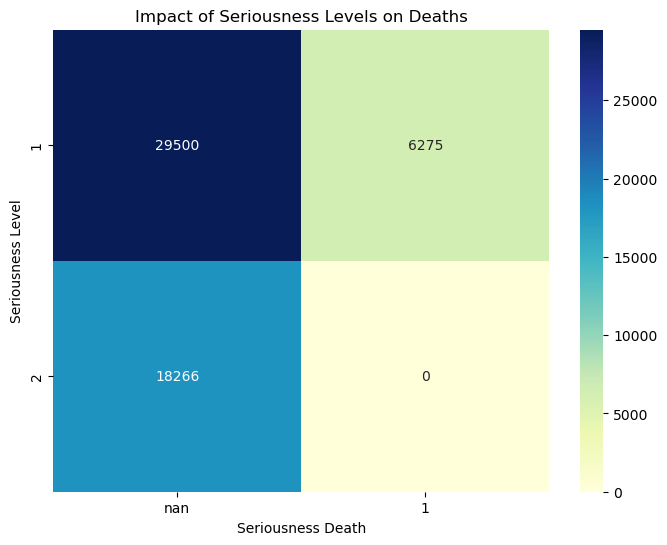

In [149]:
# Group by seriousness and seriousnessdeath
seriousness_impact = (
    df.groupBy("serious", "seriousnessdeath")
    .count()
    .orderBy("serious", "seriousnessdeath")
)

# Convert to Pandas for visualization
seriousness_impact_pd = seriousness_impact.toPandas()

# Pivot for heatmap visualization
import seaborn as sns

seriousness_pivot = seriousness_impact_pd.pivot(index="serious", columns="seriousnessdeath", values="count").fillna(0)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(seriousness_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Impact of Seriousness Levels on Deaths")
plt.xlabel("Seriousness Death")
plt.ylabel("Seriousness Level")
plt.show()


In [157]:
df.printSchema()


root
 |-- safetyreportid: string (nullable = true)
 |-- transmissiondateformat: string (nullable = true)
 |-- transmissiondate: string (nullable = true)
 |-- serious: string (nullable = true)
 |-- receivedateformat: string (nullable = true)
 |-- receiptdateformat: string (nullable = true)
 |-- receiptdate: string (nullable = true)
 |-- fulfillexpeditecriteria: string (nullable = true)
 |-- companynumb: string (nullable = true)
 |-- receiver: double (nullable = true)
 |-- primarysource.reportercountry: string (nullable = true)
 |-- primarysource.qualification: string (nullable = true)
 |-- sender.senderorganization: string (nullable = true)
 |-- patient.patientsex: string (nullable = true)
 |-- patient.reaction: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- reactionmeddrapt: string (nullable = true)
 |    |    |-- reactionmeddraversionpt: string (nullable = true)
 |    |    |-- reactionoutcome: string (nullable = true)
 |-- patient.drug: array (n

In [49]:
# %pip install duckdb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 37.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [51]:
# import duckdb

# # Check DuckDB version
# print(duckdb.__version__)

1.1.3


In [17]:
import sys
sys.executable #base env

'/opt/anaconda3/bin/python'

In [19]:
!which python
!which java
!echo $JAVA_HOME

/opt/anaconda3/bin/python
/opt/anaconda3/envs/bigdata/lib/jvm/bin/java
/opt/anaconda3/envs/bigdata/lib/jvm


In [21]:
import pyspark
print(f"Spark version: {pyspark.__version__}")


Spark version: 3.5.3
